In [37]:
import re
import os 
import datetime
from math import log
import csv
import pprint
import math
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pandas as pd
from pandas.io.parsers import read_csv
pd.set_option('max_colwidth',120)
from elasticsearch import Elasticsearch, helpers
from elasticsearch.helpers import scan
#from __future__ import division:q
import urllib

%matplotlib inline

pp = pprint.PrettyPrinter()

In [2]:
#bashcommand='pwd'

In [3]:
es = Elasticsearch([{'host':'atlas-kibana.mwt2.org', 'port':9200}],timeout=20)

In [38]:
#list=['jobs_archive_2017-02-10','jobs_archive_2017-02-11','jobs_archive_2017-02-12','jobs_archive_2017-02-13','jobs_archive_2017-02-14']
list=['jobs_archive_2018-05-30','jobs_archive_2018-05-31','jobs_archive_2018-06-01',
      'jobs_archive_2018-06-02','jobs_archive_2018-06-03','jobs_archive_2018-06-04',
      'jobs_archive_2018-06-05','jobs_archive_2018-06-06','jobs_archive_2018-06-07',
      'jobs_archive_2018-06-08','jobs_archive_2018-06-09','jobs_archive_2018-06-10',
      'jobs_archive_2018-06-11']
#print (list)
indices = es.cat.indices(index=list, h="index", request_timeout=10).split('\n')
indices = sorted(indices)
indices = [x.replace(" ", "") for x in indices if x != '']
 

In [5]:
print (indices)

['jobs_archive_2018-05-30', 'jobs_archive_2018-05-31', 'jobs_archive_2018-06-01', 'jobs_archive_2018-06-02', 'jobs_archive_2018-06-03', 'jobs_archive_2018-06-04', 'jobs_archive_2018-06-05', 'jobs_archive_2018-06-06', 'jobs_archive_2018-06-07', 'jobs_archive_2018-06-08', 'jobs_archive_2018-06-09', 'jobs_archive_2018-06-10', 'jobs_archive_2018-06-11']


In [6]:
ss={
 "query": { "wildcard": { "computingsite": "IN2P3*" } 
}, "_source": ["pandaid","batchid","computingsite","computingelement","corecount","creationtime","starttime","endtime",
   "cpuconsumptiontime","wall_time","modificationhost","maxrss","maxpss","jobstatus","inputfilebytes",
"outputfilebytes","timeGetJob","timeSetup","timeStageIn","timeExe","timeStageOut","cpuconsumptionunit",
               "wall_time","ninputdatafiles","noutputdatafiles","atlasrelease","corecount","nevents","processingtype"]
#    ,"size": 5
    }



#ss= {"query": { "match_all": {} },"size": 10000} 
print (ss)



{'query': {'wildcard': {'computingsite': 'IN2P3*'}}, '_source': ['pandaid', 'batchid', 'computingsite', 'computingelement', 'corecount', 'creationtime', 'starttime', 'endtime', 'cpuconsumptiontime', 'wall_time', 'modificationhost', 'maxrss', 'maxpss', 'jobstatus', 'inputfilebytes', 'outputfilebytes', 'timeGetJob', 'timeSetup', 'timeStageIn', 'timeExe', 'timeStageOut', 'cpuconsumptionunit', 'wall_time', 'ninputdatafiles', 'noutputdatafiles', 'atlasrelease', 'corecount', 'nevents', 'processingtype']}


In [7]:
#res = es.search(index='jobs_archive_2016-06-26', body=ss, filter_path=['hits.hits._source'],request_timeout=12000)

In [8]:
 #res.get('hits').get('hits')

In [9]:
res=es.search(index=indices, body=ss,request_timeout=12000)
#print (res)
len(res)
#print (res)

4

In [10]:
scroll=scan(es,index=indices, query=ss,scroll=u'5m', raise_on_error=True, preserve_order=False, size=10000,request_timeout=700000)

In [11]:
c=1
list2=[]
for name in scroll:
 a=name.get('_source')
 list2.append(a)
 c=c+1
print (c)
type(list2)
dfu = pd.DataFrame(list2)

#dfu.to_csv('./romania_feb2017.csv')

246396


In [12]:
dfu.count()

atlasrelease          245366
batchid               179381
computingelement      183126
computingsite         246395
corecount             245366
cpuconsumptiontime    246395
cpuconsumptionunit    179339
creationtime          246395
endtime               246395
inputfilebytes        245139
jobstatus             246395
maxpss                177707
maxrss                177707
modificationhost      246395
nevents               246395
ninputdatafiles       245139
noutputdatafiles      246395
outputfilebytes       246395
pandaid               246395
processingtype        245366
starttime             179418
timeExe               246395
timeGetJob            246395
timeSetup             246395
timeStageIn           246395
timeStageOut          246395
wall_time             246395
dtype: int64

In [13]:
dfu['read']=dfu['inputfilebytes']/dfu['timeStageIn']/1024
dfu['write']=dfu['outputfilebytes']/dfu['timeStageOut']/1024
dfu['starttime'] = dfu['starttime'].map(lambda x: pd.to_datetime(x,format="%Y-%m-%d %H:%M:%S"))
dfu['endtime'] = dfu['endtime'].map(lambda x: pd.to_datetime(x,format="%Y-%m-%d %H:%M:%S"))
dfu['wwtime'] =  (dfu['endtime']-  dfu['starttime']).dt.total_seconds()
dfu.tail()

,atlasrelease,batchid,computingelement,computingsite,corecount,cpuconsumptiontime,cpuconsumptionunit,creationtime,endtime,inputfilebytes,...,starttime,timeExe,timeGetJob,timeSetup,timeStageIn,timeStageOut,wall_time,read,write,wwtime
246390,Atlas-20.7.5,43673415,IN2P3-CC_MCORE,IN2P3-CC_MCORE,1.0,321,s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB,2018-06-07T23:40:38.0,2018-06-07 23:50:07,3.707356e+07,...,2018-06-07 23:40:44,484,1,16,18,8,563,2011.369195,134.781616,563.0
246391,Atlas-19.2.3,66804.lpsc-torque.in2p3.fr,IN2P3-LPSC-cream-ce-atlas-pbs,IN2P3-LPSC,1.0,1244,s+Intel(R) Xeon(R) CPU E5410 @ 2.33GHz 6144 KB,2018-06-07T22:09:23.0,2018-06-07 22:52:36,3.773864e+07,...,2018-06-07 22:10:13,2434,2,20,33,21,2543,1116.792022,265.127976,2543.0
246392,Atlas-20.7.5,ccwlcgatlas05.in2p3.fr#115247.0#1528397433,IN2P3-CC-T3_MCORE_CSP02,IN2P3-CC-T3_MCORE_CSP02,1.0,686,s+Intel Xeon Processor (Skylake) 16384 KB,2018-06-07T22:16:38.0,2018-06-07 22:31:48,3.870593e+07,...,2018-06-07 22:17:20,773,2,9,16,6,868,2362.422607,234.666504,868.0
246393,Atlas-20.7.5,43662449,IN2P3-CC_CL7_VVL,IN2P3-CC_CL7_VVL,1.0,776,s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB,2018-06-07T23:05:32.0,2018-06-07 23:41:55,3.762038e+07,...,2018-06-07 23:26:10,856,2,14,4,3,945,9184.663574,482.835286,945.0
246394,Atlas-21.2.31,43671685,IN2P3-CC_MCORE,IN2P3-CC_MCORE,8.0,12976,s+Intel(R) Xeon(R) CPU E5-2670 0 @ 2.60GHz 20480 KB,2018-06-07T23:05:55.0,2018-06-07 23:43:53,7.271755e+09,...,2018-06-07 23:07:31,1990,1,4,89,23,2182,79790.152848,20418.377760,2182.0


In [14]:
pp2=dfu.dropna()
pp2.count()

atlasrelease          156733
batchid               156733
computingelement      156733
computingsite         156733
corecount             156733
cpuconsumptiontime    156733
cpuconsumptionunit    156733
creationtime          156733
endtime               156733
inputfilebytes        156733
jobstatus             156733
maxpss                156733
maxrss                156733
modificationhost      156733
nevents               156733
ninputdatafiles       156733
noutputdatafiles      156733
outputfilebytes       156733
pandaid               156733
processingtype        156733
starttime             156733
timeExe               156733
timeGetJob            156733
timeSetup             156733
timeStageIn           156733
timeStageOut          156733
wall_time             156733
read                  156733
write                 156733
wwtime                156733
dtype: int64

1545393.828385327

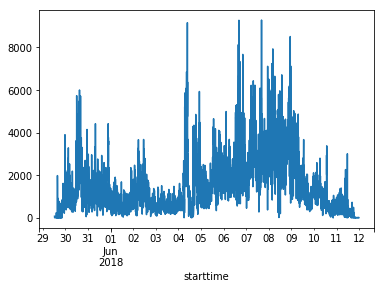

In [15]:
ppp=pp2.groupby([pd.Grouper(freq='5min',key='starttime')]).read.sum()/1024
ppp.plot()
pp2.inputfilebytes.sum()/1024/1024/1024


In [16]:
dfu[pd.isnull(dfu).any(axis=1)]

,atlasrelease,batchid,computingelement,computingsite,corecount,cpuconsumptiontime,cpuconsumptionunit,creationtime,endtime,inputfilebytes,...,starttime,timeExe,timeGetJob,timeSetup,timeStageIn,timeStageOut,wall_time,read,write,wwtime
17,Atlas-21.0.53,None,None,IN2P3-CC_CL7,1.0,0,None,2018-06-01T17:19:24.0,2018-06-03 18:21:29,8.580168e+09,...,NaT,0,0,0,0,0,0,inf,NaN,NaN
18,Atlas-21.0.53,None,None,IN2P3-CC_CL7,1.0,0,None,2018-06-01T17:19:25.0,2018-06-03 17:25:29,8.613139e+09,...,NaT,0,0,0,0,0,0,inf,NaN,NaN
19,Atlas-21.0.53,None,None,IN2P3-CC_CL7,1.0,0,None,2018-06-01T17:19:25.0,2018-06-03 17:25:29,8.549187e+09,...,NaT,0,0,0,0,0,0,inf,NaN,NaN
20,Atlas-21.0.53,None,None,IN2P3-CC_CL7,1.0,0,None,2018-06-01T17:19:25.0,2018-06-03 17:25:30,8.574366e+09,...,NaT,0,0,0,0,0,0,inf,NaN,NaN
21,Atlas-19.2.5,43234469,IN2P3-CC_CL7_VVL,IN2P3-CC_CL7_VVL,1.0,55541,s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB,2018-06-02T03:12:06.0,2018-06-02 23:35:47,0.000000e+00,...,2018-06-02 07:23:50,58254,2,22,0,2,58317,NaN,4254.788574,58317.0
22,Atlas-19.2.5,43235683,IN2P3-CC_CL7_VVL,IN2P3-CC_CL7_VVL,1.0,55829,s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB,2018-06-02T03:12:06.0,2018-06-03 00:17:11,0.000000e+00,...,2018-06-02 07:26:08,60605,1,14,0,3,60663,NaN,2766.152018,60663.0
23,Atlas-19.2.5,43235678,IN2P3-CC_CL7_VVL,IN2P3-CC_CL7_VVL,1.0,46409,s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB,2018-06-02T03:12:06.0,2018-06-02 21:33:45,0.000000e+00,...,2018-06-02 07:29:03,50621,1,7,0,2,50682,NaN,4094.484863,50682.0
24,Atlas-19.2.5,43233622,IN2P3-CC_CL7,IN2P3-CC_CL7,1.0,52170,s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB,2018-06-02T03:12:07.0,2018-06-02 22:05:29,0.000000e+00,...,2018-06-02 06:37:14,55642,1,11,0,3,55695,NaN,2901.087891,55695.0
25,Atlas-19.2.5,43236935,IN2P3-CC_CL7_VVL,IN2P3-CC_CL7_VVL,1.0,50177,s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB,2018-06-02T03:35:12.0,2018-06-03 00:21:34,0.000000e+00,...,2018-06-02 08:44:02,56174,1,16,0,3,56252,NaN,2809.987630,56252.0
26,Atlas-19.2.5,43236939,IN2P3-CC_CL7_VVL,IN2P3-CC_CL7_VVL,1.0,45304,s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB,2018-06-02T03:35:12.0,2018-06-02 22:01:02,0.000000e+00,...,2018-06-02 08:47:47,47551,4,7,0,2,47595,NaN,4258.737305,47595.0


In [80]:


#rint (res.get('hits').get('hits'))
#list.head()
#res[0]
#res['total']
dfu['brate']=dfu['corecount']*dfu['wwtime']/dfu['nevents']
dfu['arate']=dfu['corecount']*dfu['timeExe']/dfu['nevents']
dfu['crate']=dfu['cpuconsumptiontime']/dfu['nevents']
 


In [87]:
data=dfu[(dfu['starttime']>'2018-05-31') & (dfu['endtime'] <'2018-06-11') &
         (dfu['corecount']==8) & (dfu['jobstatus']=='finished') & 
         (dfu['atlasrelease']=='Atlas-21.0.15') & (dfu['processingtype']=='simul')]

computingsite
IN2P3-CC-T3_MCORE_CSP01     Axes(0.125,0.125;0.775x0.755)
IN2P3-CC-T3_MCORE_CSP02     Axes(0.125,0.125;0.775x0.755)
IN2P3-CC_CL7_MCORE          Axes(0.125,0.125;0.775x0.755)
IN2P3-CC_CL7_MCORE_HIMEM    Axes(0.125,0.125;0.775x0.755)
IN2P3-CC_MCORE              Axes(0.125,0.125;0.775x0.755)
Name: brate, dtype: object

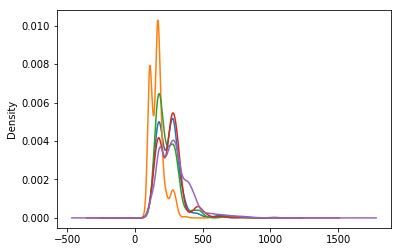

In [88]:
data.groupby(['computingsite']).brate.plot.kde()

In [89]:
data.groupby(['computingsite']).brate.describe()

,count,mean,std,min,25%,50%,75%,max
computingsite,,,,,,,,
IN2P3-CC-T3_MCORE_CSP01,860.0,254.096977,101.474630,117.448,178.756,249.872,288.790,861.296
IN2P3-CC-T3_MCORE_CSP02,1084.0,163.744804,51.751099,80.896,120.292,163.840,184.206,388.016
IN2P3-CC_CL7_MCORE,870.0,236.376331,85.484192,108.944,173.770,213.140,282.752,759.296
IN2P3-CC_CL7_MCORE_HIMEM,823.0,260.969769,97.808539,108.984,180.460,263.720,303.532,1041.512
IN2P3-CC_MCORE,9625.0,293.044425,121.128914,95.232,202.248,276.568,349.976,1218.584


In [102]:
x=400*11*24*3600
print (x/164,x/254)

2318048.7804878047 1496692.9133858269


In [97]:
data.groupby(['computingsite']).arate.describe()

,count,mean,std,min,25%,50%,75%,max
computingsite,,,,,,,,
IN2P3-CC-T3_MCORE_CSP01,860.0,252.701219,101.452969,116.136,177.192,248.384,287.364,859.816
IN2P3-CC-T3_MCORE_CSP02,1084.0,162.785550,51.742726,79.960,119.528,162.948,183.376,387.320
IN2P3-CC_CL7_MCORE,870.0,235.690041,85.468047,108.424,172.974,212.484,281.916,758.520
IN2P3-CC_CL7_MCORE_HIMEM,823.0,260.279028,97.792856,108.576,179.864,262.992,302.760,1040.704
IN2P3-CC_MCORE,9625.0,291.896603,121.063713,94.352,201.112,275.328,348.736,1215.504


In [85]:
data.groupby(['computingsite']).crate.describe()

,count,mean,std,min,25%,50%,75%,max
computingsite,,,,,,,,
IN2P3-CC-T3_MCORE_CSP01,860.0,244.890009,95.454775,111.580,171.66625,241.9205,280.02200,792.947
IN2P3-CC-T3_MCORE_CSP02,1084.0,158.852294,51.329448,76.985,115.80525,158.9950,179.07700,380.920
IN2P3-CC_CL7_MCORE,904.0,231.337208,83.591576,104.813,169.42400,214.0860,276.09625,734.790
IN2P3-CC_CL7_MCORE_HIMEM,823.0,254.141768,96.470503,105.327,173.84250,256.8290,295.53700,1026.414
IN2P3-CC_MCORE,10219.0,284.012370,118.749677,91.294,195.26100,267.7080,338.62200,1203.221


In [86]:
data.groupby(['computingsite']).read.describe()

,count,mean,std,min,25%,50%,75%,max
computingsite,,,,,,,,
IN2P3-CC-T3_MCORE_CSP01,860.0,7383.954933,1718.968103,1106.149623,6028.122048,7351.682903,8952.691644,10419.484794
IN2P3-CC-T3_MCORE_CSP02,1084.0,15841.482343,4543.623316,1478.541732,12535.974596,15778.120203,19562.826451,28906.346094
IN2P3-CC_CL7_MCORE,904.0,48039.191545,9621.770734,1877.307965,44512.309961,47343.394141,53041.412384,86216.584635
IN2P3-CC_CL7_MCORE_HIMEM,823.0,50520.037174,8919.692132,12146.227338,44757.987695,51319.894897,57065.862863,133425.747721
IN2P3-CC_MCORE,10219.0,12670.155760,4045.155130,697.565076,9649.610054,12470.736476,16150.000709,24310.657335


In [31]:
data.groupby(['computingsite','cpuconsumptionunit']).brate.describe()

count  \
computingsite            cpuconsumptionunit                                              
IN2P3-CC-T3_MCORE_CSP01  s+Intel(R) Xeon(R) CPU E5-2658 v4 @ 2.30GHz 35840 KB    230.0   
                         s+Intel(R) Xeon(R) CPU E5-2658A v3 @ 2.20GHz 30720 KB   630.0   
IN2P3-CC-T3_MCORE_CSP02  s+Intel Xeon E312xx (Sandy Bridge) 16384 KB             509.0   
                         s+Intel Xeon Processor (Skylake) 16384 KB               575.0   
IN2P3-CC_CL7_MCORE       s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB    265.0   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB     89.0   
                         s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB    195.0   
                         s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB   569.0   
IN2P3-CC_CL7_MCORE_HIMEM s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB    270.0   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB     80.0   
                         s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB    157.0   
                         s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB   558.0   
IN2P3-CC_MCORE           s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB   1759.0   
                         s+Intel(R) Xeon(R) CPU E5-2670 0 @ 2.60GHz 20480 KB    5959.0   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB   1928.0   
                         s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB   1157.0   

                                                                                     mean  \
computingsite            cpuconsumptionunit                                                 
IN2P3-CC-T3_MCORE_CSP01  s+Intel(R) Xeon(R) CPU E5-2658 v4 @ 2.30GHz 35840 KB   27.004457   
                         s+Intel(R) Xeon(R) CPU E5-2658A v3 @ 2.20GHz 30720 KB  33.499048   
IN2P3-CC-T3_MCORE_CSP02  s+Intel Xeon E312xx (Sandy Bridge) 16384 KB            22.000770   
                         s+Intel Xeon Processor (Skylake) 16384 KB              19.111355   
IN2P3-CC_CL7_MCORE       s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB   31.527404   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB   45.073966   
                         s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB   30.010369   
                         s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB  26.166912   
IN2P3-CC_CL7_MCORE_HIMEM s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB   33.557685   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB   50.578250   
                         s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB   28.404618   
                         s+Intel(R) Xeon(R) Silver 4114 CPU @ 2.20GHz 14080 KB  26.764799   
IN2P3-CC_MCORE           s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB   25.811643   
                         s+Intel(R) Xeon(R) CPU E5-2670 0 @ 2.60GHz 20480 KB    42.437380   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB   37.720787   
                         s+Intel(R) Xeon(R) CPU E5-2680 v3 @ 2.50GHz 30720 KB   27.529334   

                                                                                      std  \
computingsite            cpuconsumptionunit                                                 
IN2P3-CC-T3_MCORE_CSP01  s+Intel(R) Xeon(R) CPU E5-2658 v4 @ 2.30GHz 35840 KB    7.534732   
                         s+Intel(R) Xeon(R) CPU E5-2658A v3 @ 2.20GHz 30720 KB  13.702423   
IN2P3-CC-T3_MCORE_CSP02  s+Intel Xeon E312xx (Sandy Bridge) 16384 KB             7.674259   
                         s+Intel Xeon Processor (Skylake) 16384 KB               4.785898   
IN2P3-CC_CL7_MCORE       s+Intel(R) Xeon(R) CPU E5-2650 v4 @ 2.20GHz 30720 KB    8.423100   
                         s+Intel(R) Xeon(R) CPU E5-2680 v2 @ 2.80GHz 25600 KB   14.994895   
                         s+Intel(R) Xeon(

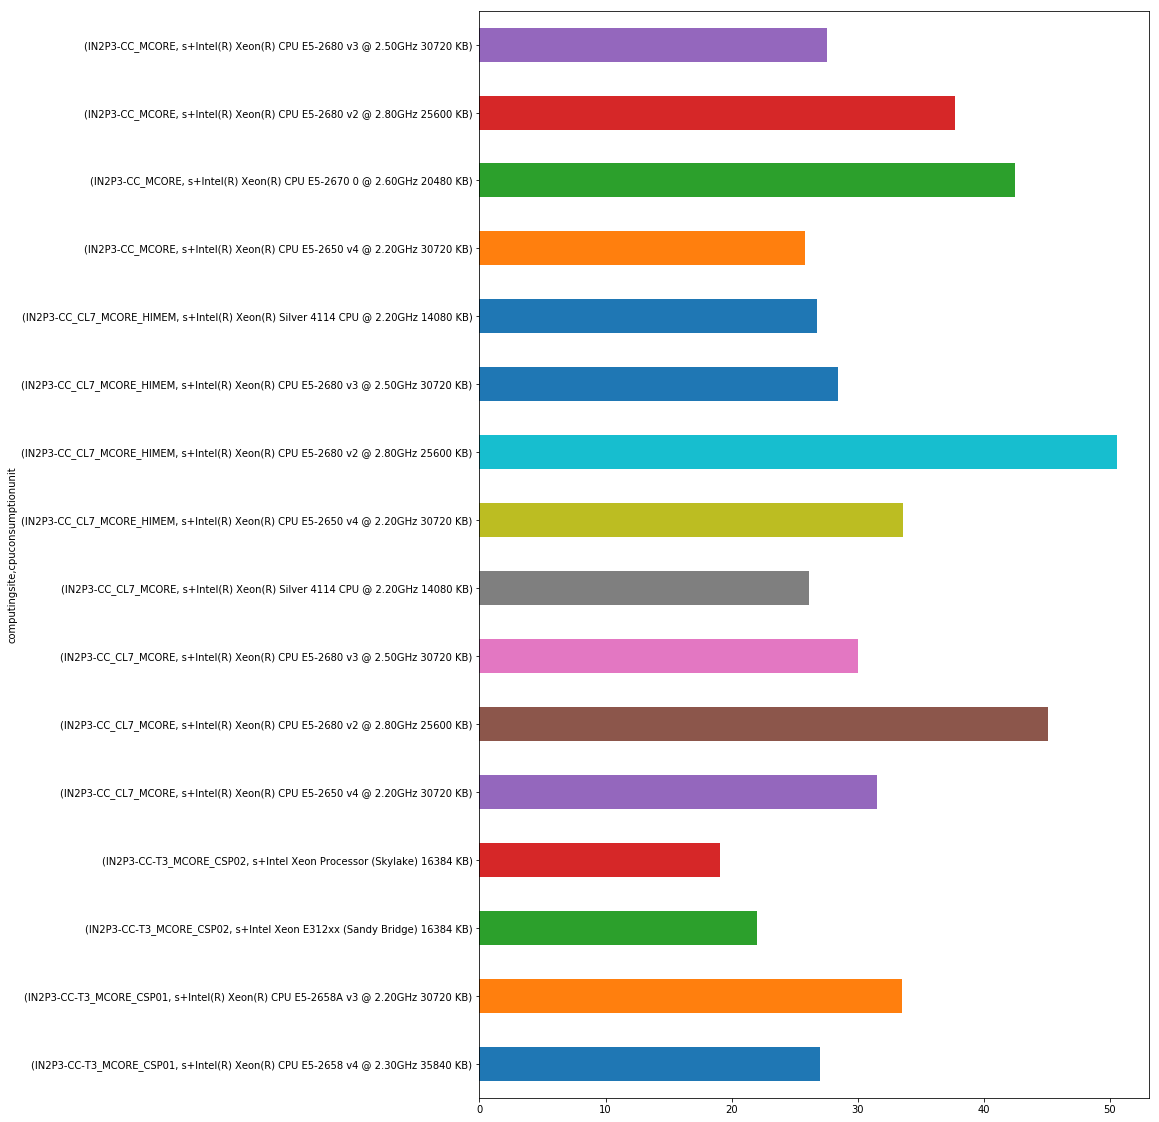

In [36]:
data.groupby(['computingsite','cpuconsumptionunit']).brate.mean().plot.barh(figsize=(12,20))

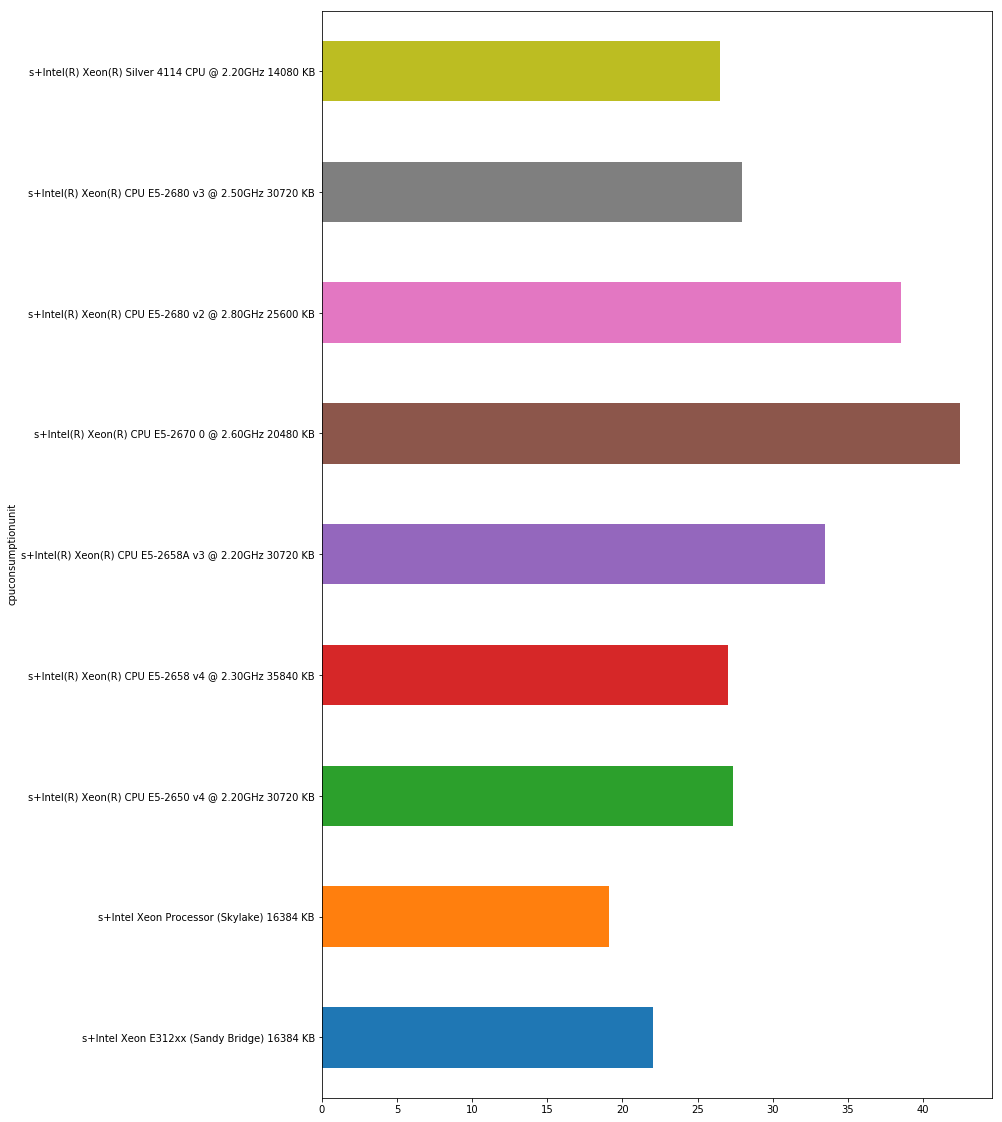

In [42]:
data.groupby(['cpuconsumptionunit']).brate.mean().plot.barh(figsize=(12,20))